### Here we Are Predicting Temperature.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data = data.iloc[:,1:]

In [4]:
data.shape

(244, 15)

# Data Cleaning

In [5]:
data.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
region         0
dtype: int64

In [6]:
data[data.isnull().any(axis=1)]
data.dropna()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
240,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


# add new col with region
Bejala - 0
sidibel - 1

In [7]:
# data.loc[:121,'region']=0
# data.loc[124:,'region']=1

In [8]:
data = data.dropna().reset_index(drop=True)

In [9]:
data.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
dtype: int64

In [10]:
data.sample(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
45,16,7,2012,28,76,21,0.0,72.6,7.0,25.5,0.7,8.3,0.4,not fire,0
114,23,9,2012,32,54,11,0.5,73.7,7.9,30.4,1.2,9.6,0.7,not fire,0
16,17,6,2012,30,89,16,0.6,37.3,1.1,7.8,0.0,1.6,0,not fire,0
138,17,6,2012,31,69,17,4.7,62.2,3.9,8,1.1,3.8,0.4,not fire,1
67,7,8,2012,32,69,16,0.0,86.5,15.5,48.6,5.5,17.2,8,fire,0
145,24,6,2012,35,68,16,0.0,85.3,10.0,17,4.9,9.9,5.3,fire,1
124,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1
183,2,8,2012,40,34,14,0.0,93.3,10.8,21.4,13.8,10.6,13.5,fire,1
187,6,8,2012,30,54,14,3.1,70.5,11.0,9.1,1.3,10.5,0.8,not fire,1
110,19,9,2012,29,57,14,0.0,89.3,12.5,41.3,7.8,14.2,9.7,fire,0


In [11]:
data.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'region'],
      dtype='object')

In [12]:
# Fix sapce in columns
data.columns = data.columns.str.strip()
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    object 
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    object 
 13  Classes      243 non-null    object 
 14  region       243 non-null    int64  
dtypes: float64(5), int64(7), object(3)
memory usage: 28.6+ KB


# to change in int
# column.astype(int)
# in float
# columns.astype(float)


In [14]:
data[['DC','FWI']] = data[['DC','FWI']].astype(float)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [16]:
data.to_csv('data_cleaned.csv',index=False)

### Exploratory Data Analysis

In [17]:
df = data

In [18]:
# drop year,month,day
data = data.drop(['day','month','year'],axis=1)

In [19]:
data.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [20]:
data['Classes'] = np.where(data['Classes'].str.contains('not fire'),0,1)

In [21]:
data['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [22]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

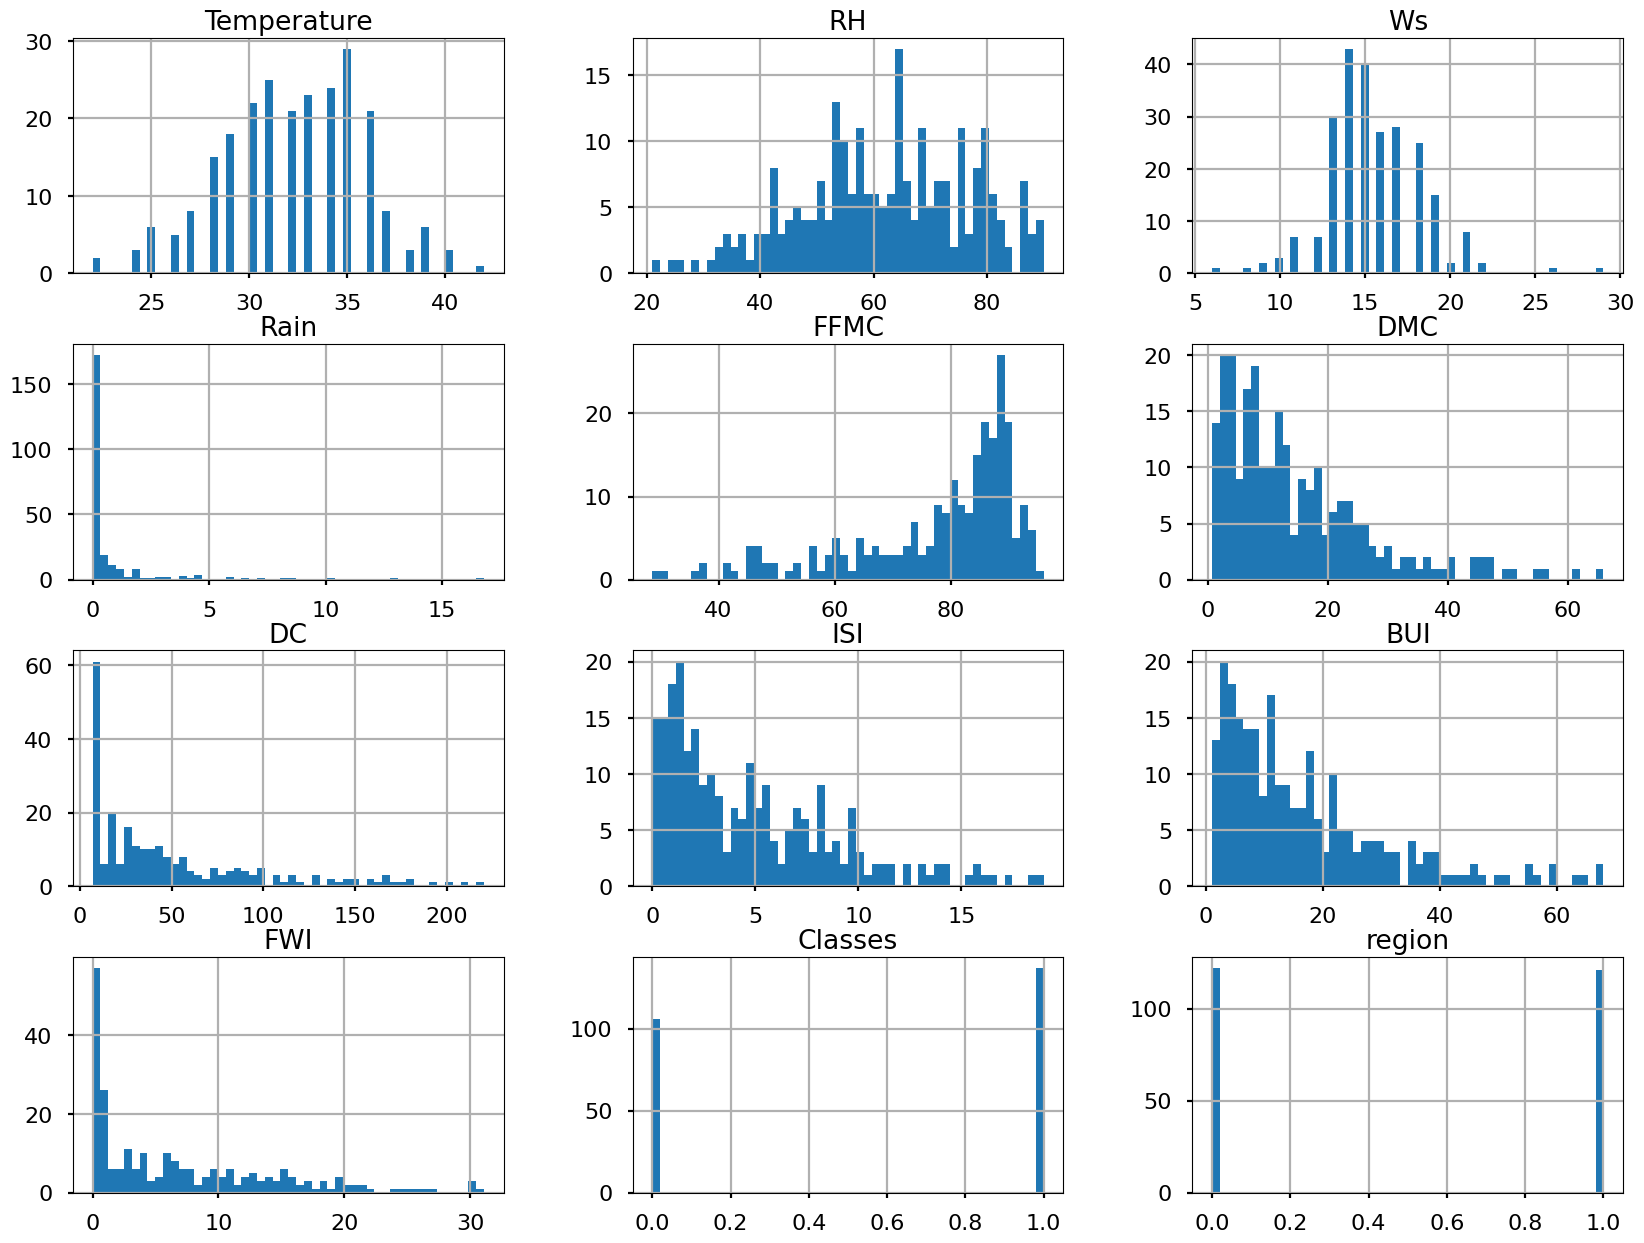

In [23]:
### Plot
plt.style.use('seaborn-v0_8-poster')
data.hist(bins=50,figsize=(20,15))
plt.show()

In [24]:
# percentage for pie chart.

In [25]:
percentage = data['Classes'].value_counts(normalize=True)

Text(0.5, 1.0, 'Pie Chart of Classes')

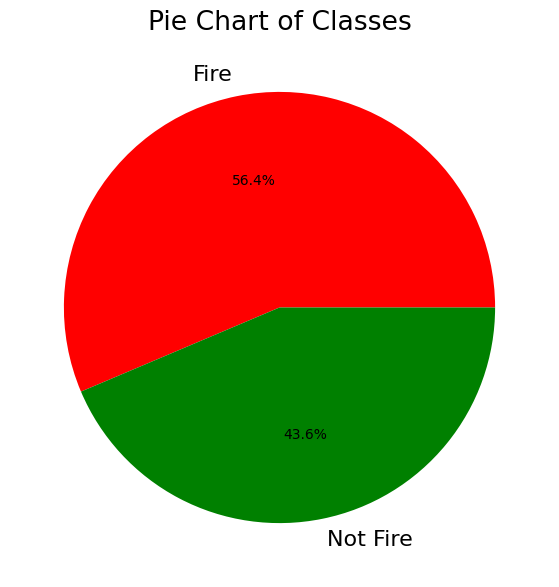

In [26]:
classlabel = ['Fire','Not Fire']
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlabel,autopct='%1.1f%%',colors=['r','g'])
plt.title('Pie Chart of Classes')

In [27]:
data.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

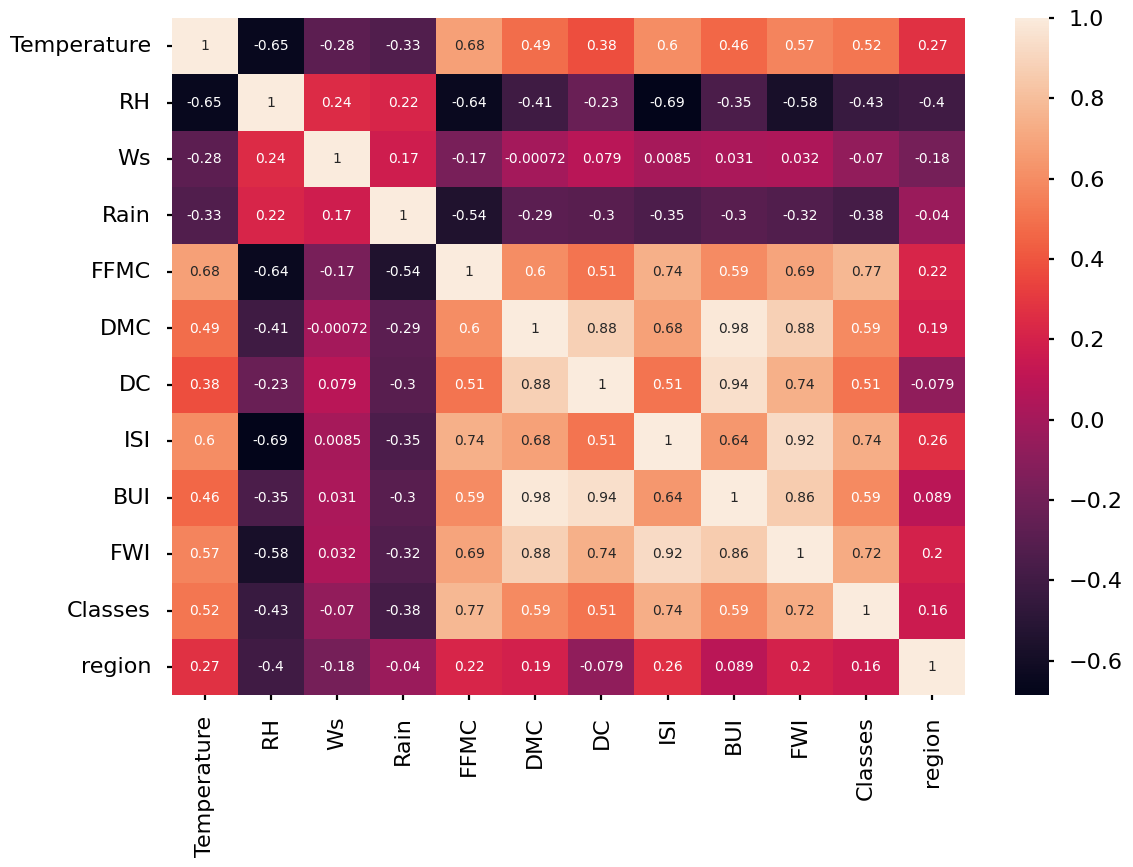

In [28]:
sns.heatmap(data.corr(),annot=True) 

In [29]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

C:\Users\vikas\AppData\Local\Temp\ipykernel_29520\2420115400.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:y'` for the same effect.

  sns.countplot(x='month',hue='Classes',data=df,color='y')


Text(0, 0.5, 'Number of Fire')

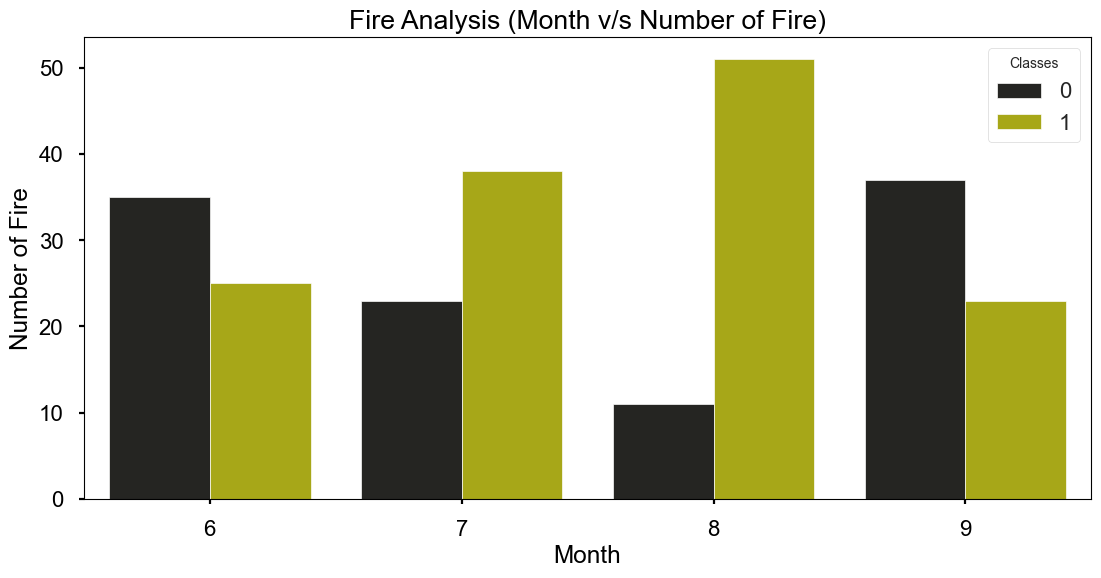

In [30]:
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df,color='y')
plt.title('Fire Analysis (Month v/s Number of Fire)')
plt.xlabel('Month')
plt.ylabel('Number of Fire')

# Model Training.

In [31]:
dataFrame = pd.read_csv('data_cleaned.csv')

In [32]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [33]:
dataFrame.drop(['day','month','year'],axis=1,inplace=True)

In [34]:
dataFrame

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [35]:
dataFrame['Classes'] = np.where(dataFrame['Classes'].str.contains('not fire'),0,1)

In [36]:
dataFrame

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [39]:
# Feature splitting
X = dataFrame.drop('Temperature',axis=1)
y = dataFrame['Temperature']

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [41]:
print(f"{X_train.shape = }")
print(f"{X_test.shape = }")
print(f"{y_train.shape = }")
print(f"{y_test.shape = }")

X_train.shape = (182, 11)
X_test.shape = (61, 11)
y_train.shape = (182,)
y_test.shape = (61,)


<Axes: >

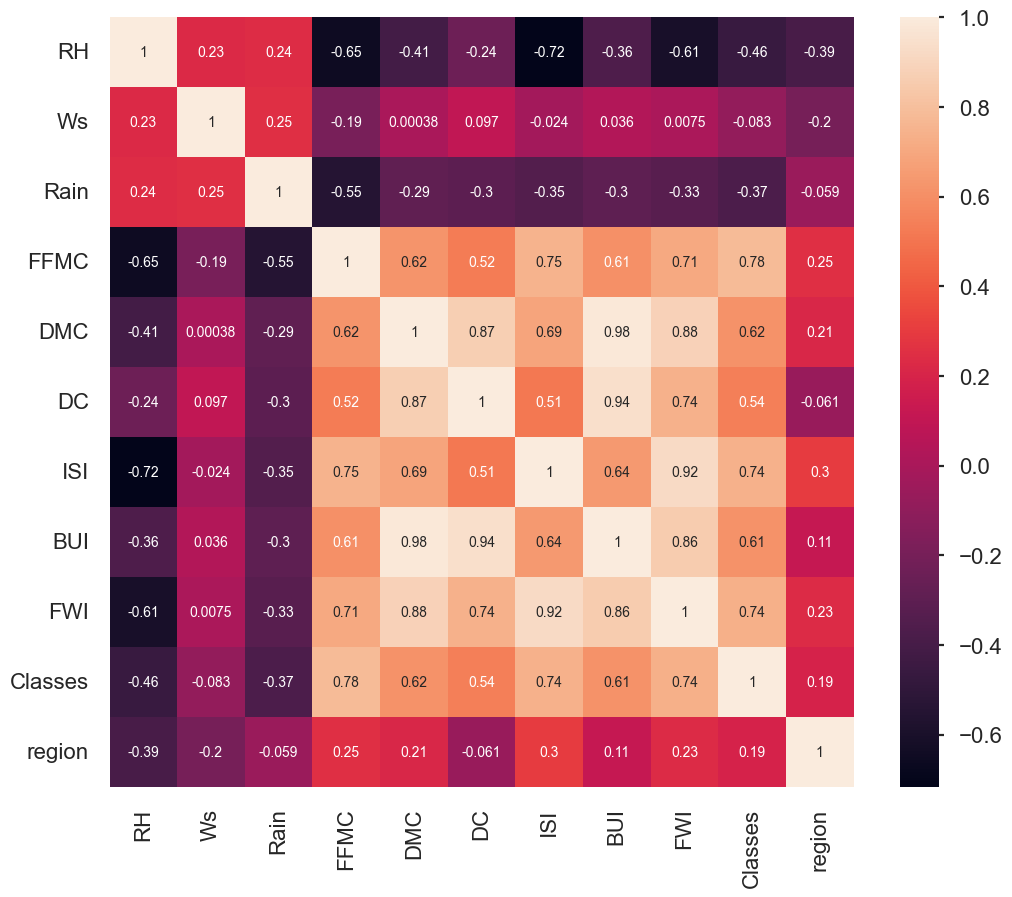

In [42]:
plt.figure(figsize=(12,10))
sns.heatmap(X_train.corr(),annot=True)

In [43]:
 # Here the Features which are correlated more Than 95 % are removed as they are doing MULTICOLLINEARITY.

In [44]:
X_train.corr().iloc[10,8]

0.2296849466797795

In [45]:
def corr(dataset,threshold):
    cols = set()
    matrix = dataset.corr()
    for i in range(len(matrix.columns)):
        for j in range(i):
            if abs(matrix.iloc[i,j]) > threshold:
                cols.add(matrix.columns[i])
    return cols

In [46]:
def corr_dict(dataset,threshold):
    cols = dict()
    matrix = dataset.corr()
    for i in range(len(matrix.columns)):
        for j in range(i):
            if abs(matrix.iloc[i,j]) > threshold:
                cols[matrix.columns[i]]  = (matrix.columns[j],matrix.iloc[i,j])
    return cols

In [47]:
cols_dict = corr_dict(X_train,0.85)

In [48]:
cols = corr(X_train,0.85)

In [49]:
cols_dict

{'DC': ('DMC', 0.8686472047539086),
 'BUI': ('DC', 0.9424144019919156),
 'FWI': ('BUI', 0.8571499617283508)}

In [50]:
cols

{'BUI', 'DC', 'FWI'}

In [51]:
X_train.drop(cols,axis=1,inplace=True)
X_test.drop(cols,axis=1,inplace=True)

In [52]:
print(f"{X_train.shape = }")
print(f"{X_test.shape = }")
print(f"{y_train.shape = }")
print(f"{y_test.shape = }")

X_train.shape = (182, 8)
X_test.shape = (61, 8)
y_train.shape = (182,)
y_test.shape = (61,)


In [53]:
# Now StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [54]:
print(f"{X_train_scaled.shape = }")
print(f"{X_test_scaled.shape = }")
print(f"{y_train.shape = }")
print(f"{y_test.shape = }")

X_train_scaled.shape = (182, 8)
X_test_scaled.shape = (61, 8)
y_train.shape = (182,)
y_test.shape = (61,)


Text(0.5, 1.0, 'Before Scaling')

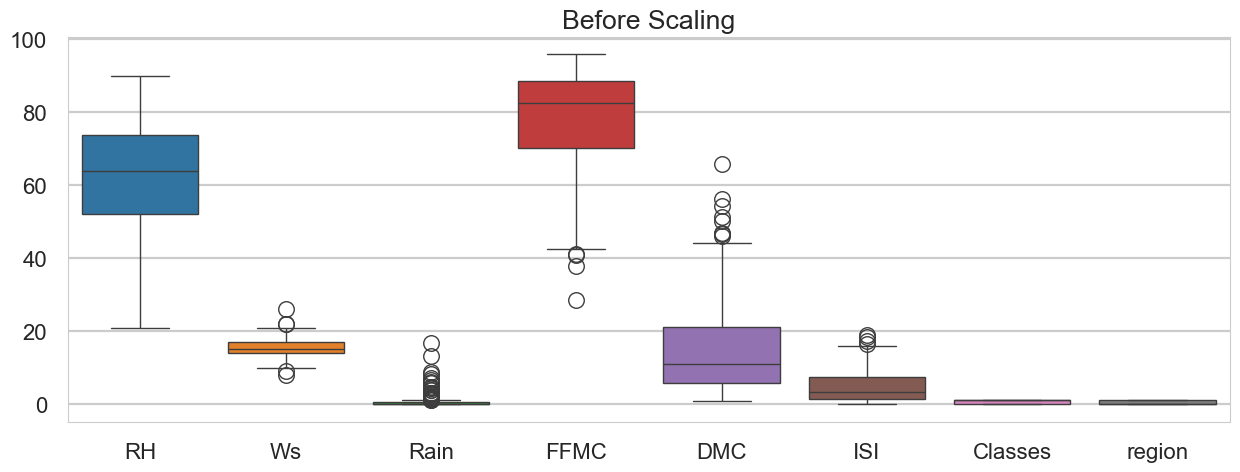

In [55]:
# BOX plot Before and After (Standard Scaler)
plt.subplots(figsize=(15,5))
sns.boxplot(data=X_train)
plt.title('Before Scaling')

Text(0.5, 1.0, 'After Scaling')

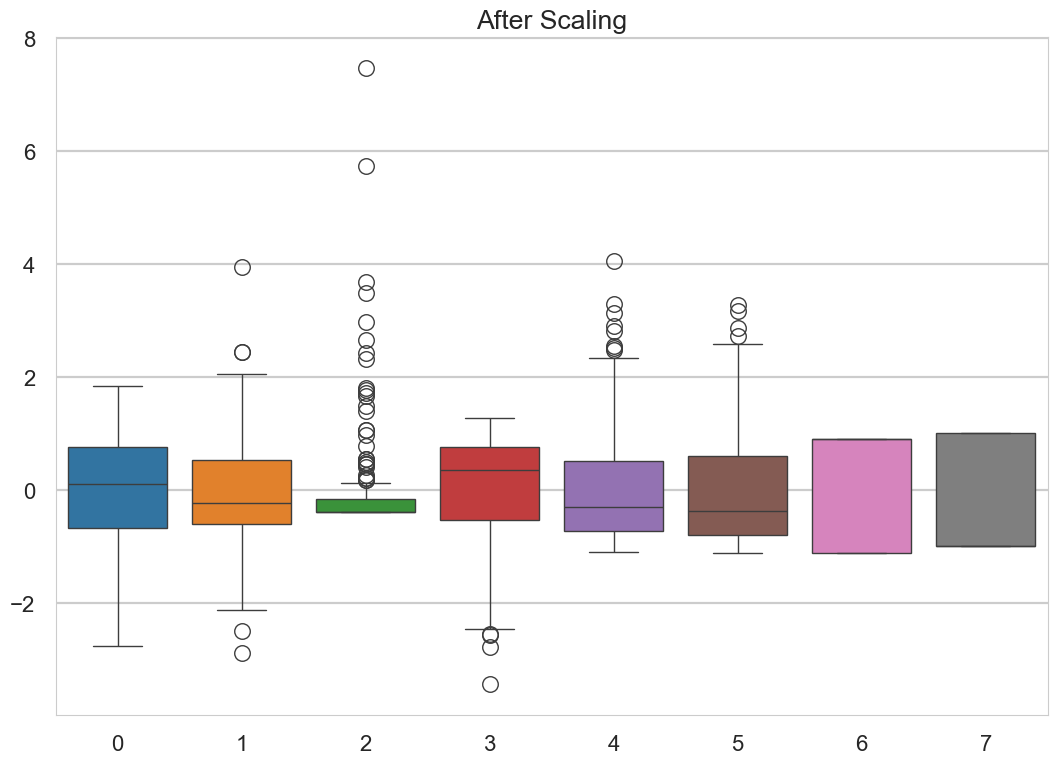

In [56]:
sns.boxplot(data = X_train_scaled)
plt.title('After Scaling')

In [57]:
# Linear Model
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train_scaled,y_train)
y_pred = regression.predict(X_test_scaled)
print("Mean Squared Error :{} ".format(mean_squared_error(y_test,y_pred)))
print("Mean Absolute Error :{} ".format(mean_absolute_error(y_test,y_pred)))
print("R_2 Error :{} ".format(r2_score(y_test,y_pred)))

Mean Squared Error :6.339735428378812 
Mean Absolute Error :2.07277162967601 
R_2 Error :0.44579815982245086 


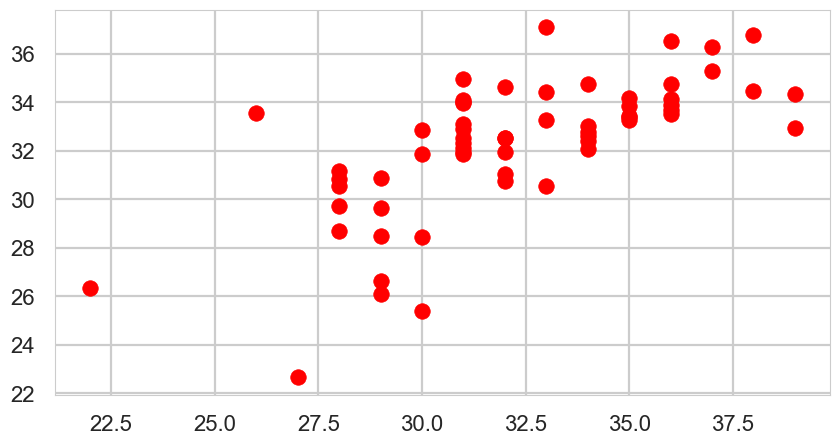

In [58]:
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred,c='r')

In [59]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred_2 = lasso.predict(X_test_scaled)
print("Mean Squared Error :{} ".format(mean_squared_error(y_test,y_pred_2)))
print("Mean Absolute Error :{} ".format(mean_absolute_error(y_test,y_pred_2)))
print("R_2 Error :{} ".format(r2_score(y_test,y_pred_2)))

Mean Squared Error :6.526166015862152 
Mean Absolute Error :2.133660267664301 
R_2 Error :0.4295009222143714 


In [60]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred_3 = ridge.predict(X_test_scaled)
print("Mean Squared Error :{} ".format(mean_squared_error(y_test,y_pred_3)))
print("Mean Absolute Error :{} ".format(mean_absolute_error(y_test,y_pred_3)))
print("R_2 Error :{} ".format(r2_score(y_test,y_pred_3)))

Mean Squared Error :6.316242975607127 
Mean Absolute Error :2.0691508461335566 
R_2 Error :0.4478518039695034 


In [61]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import ElasticNet
en = ElasticNet()
en.fit(X_train_scaled,y_train)
y_pred_4 = en.predict(X_test_scaled)
print("Mean Squared Error :{} ".format(mean_squared_error(y_test,y_pred_4)))
print("Mean Absolute Error :{} ".format(mean_absolute_error(y_test,y_pred_4)))
print("R_2 Error :{} ".format(r2_score(y_test,y_pred_4)))

Mean Squared Error :6.270067929530141 
Mean Absolute Error :2.0437711479844483 
R_2 Error :0.4518882966268465 


In [62]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(cv=5)
ridge_cv.fit(X_train_scaled,y_train)
y_pred_5 = ridge_cv.predict(X_test_scaled)
print("Mean Squared Error :{} ".format(mean_squared_error(y_test,y_pred_5)))
print("Mean Absolute Error :{} ".format(mean_absolute_error(y_test,y_pred_5)))
print("R_2 Error :{} ".format(r2_score(y_test,y_pred_5)))

Mean Squared Error :6.161425413279298 
Mean Absolute Error :2.0436226282770655 
R_2 Error :0.46138551983244214 


In [63]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(cv=5)
lasso_cv.fit(X_train_scaled,y_train)
y_pred_6 = lasso_cv.predict(X_test_scaled)
print("Mean Squared Error :{} ".format(mean_squared_error(y_test,y_pred_6)))
print("Mean Absolute Error :{} ".format(mean_absolute_error(y_test,y_pred_6)))
print("R_2 Error :{} ".format(r2_score(y_test,y_pred_6)))

Mean Squared Error :5.940775691737765 
Mean Absolute Error :2.0103471151306893 
R_2 Error :0.4806740978960621 


In [64]:
import pickle
pickle.dump(sc,open('scaler.pkl','wb'))
pickle.dump(lasso_cv,open('model.pkl','wb'))